In [1]:
using MomentClosure, Catalyst, Latexify

┌ Info: Precompiling MomentClosure [01a1b25a-ecf0-48c5-ae58-55bfd5393600]
└ @ Base loading.jl:1278


In [2]:
@parameters t, k_on, k_off, k_p, γ_p, b
@variables p(t), g(t)

vars = [g, p]

ps = [k_on, k_off, k_p, γ_p, b]

S = [1 -1 0 0; 
     0 0 b -1]

as = [k_on*(1-g),    # 0 -> g
      k_off*g*(p^2), # g -> 0
      k_p*g,         # 0 -> mP, m ~ Geometric(mean=b) 
      γ_p*p]         # p -> 0

binary_vars = [1]

rn = ReactionSystemMod(t, vars, ps, as, S)

ReactionSystemMod(t, Term{Real}[g(t), p(t)], Sym{ModelingToolkit.Parameter{Real}}[k_on, k_off, k_p, γ_p, b], SymbolicUtils.Mul{Real,Int64,Dict{Any,Number}}[k_on*(1 - (g(t))), k_off*g(t)*((p(t))^2), k_p*g(t), γ_p*p(t)], Any[1 -1 0 0; 0 0 b -1])

In [3]:
raw_eqs = generate_raw_moment_eqs(rn, 3);

In [4]:
latexify(raw_eqs.odes)

L"\begin{align}
\frac{d\mu{_{10}}(t)}{dt} =& k_{on} -1.0 k_{off} \mathrm{\mu{_{12}}}\left( t \right) -1 k_{on} \mathrm{\mu{_{10}}}\left( t \right) \\
\frac{d\mu{_{01}}(t)}{dt} =& b k_{p} \mathrm{\mu{_{10}}}\left( t \right) -1.0 \gamma_{p} \mathrm{\mu{_{01}}}\left( t \right) \\
\frac{d\mu{_{20}}(t)}{dt} =& k_{on} + k_{off} \mathrm{\mu{_{12}}}\left( t \right) + 2.0 \left( k_{on} \mathrm{\mu{_{10}}}\left( t \right) -1 k_{on} \mathrm{\mu{_{20}}}\left( t \right) \right) -2.0 k_{off} \mathrm{\mu{_{22}}}\left( t \right) -1 k_{on} \mathrm{\mu{_{10}}}\left( t \right) \\
\frac{d\mu{_{11}}(t)}{dt} =& k_{on} \mathrm{\mu{_{01}}}\left( t \right) + b k_{p} \mathrm{\mu{_{20}}}\left( t \right) -1.0 k_{off} \mathrm{\mu{_{13}}}\left( t \right) -1 k_{on} \mathrm{\mu{_{11}}}\left( t \right) -1.0 \gamma_{p} \mathrm{\mu{_{11}}}\left( t \right) \\
\frac{d\mu{_{02}}(t)}{dt} =& \gamma_{p} \mathrm{\mu{_{01}}}\left( t \right) + k_{p} \mathrm{\mu{_{10}}}\left( t \right) \left( b + 2 b^{2} \right) -2.0 \gamma_{p} \

In [5]:
clean_raw_eqs = MomentClosure.bernoulli_moment_eqs(raw_eqs, binary_vars)
latexify(clean_raw_eqs)

L"\begin{align*}
\frac{d\mu{_{10}}}{dt} =& k_{on} - k_{off} \mu{_{12}} - k_{on} \mu{_{10}} \\
\frac{d\mu{_{01}}}{dt} =& b k_{p} \mu{_{10}} - \gamma_{p} \mu{_{01}} \\
\frac{d\mu{_{11}}}{dt} =& k_{on} \mu{_{01}} + b k_{p} \mu{_{10}} - k_{off} \mu{_{13}} - k_{on} \mu{_{11}} - \gamma_{p} \mu{_{11}} \\
\frac{d\mu{_{02}}}{dt} =& \gamma_{p} \mu{_{01}} + b k_{p} \mu{_{10}} + 2 b k_{p} \mu{_{11}} + 2 k_{p} \mu{_{10}} b^{2} - 2 \gamma_{p} \mu{_{02}} \\
\frac{d\mu{_{12}}}{dt} =& k_{on} \mu{_{02}} + \gamma_{p} \mu{_{11}} + b k_{p} \mu{_{10}} + 2 b k_{p} \mu{_{11}} + 2 k_{p} \mu{_{10}} b^{2} - k_{off} \mu{_{14}} - k_{on} \mu{_{12}} - 2 \gamma_{p} \mu{_{12}} \\
\frac{d\mu{_{03}}}{dt} =& b k_{p} \mu{_{10}} + 3 \gamma_{p} \mu{_{02}} + 3 b k_{p} \mu{_{11}} + 3 b k_{p} \mu{_{12}} + 6 k_{p} \mu{_{10}} b^{2} + 6 k_{p} \mu{_{10}} b^{3} + 6 k_{p} \mu{_{11}} b^{2} - \gamma_{p} \mu{_{01}} - 3 \gamma_{p} \mu{_{03}}
\end{align*}
"

In [6]:
closed_raw_eqs = moment_closure(raw_eqs, "conditional gaussian", binary_vars);

In [7]:
latexify(closed_raw_eqs)

L"\begin{align*}
\frac{d\mu{_{10}}}{dt} =& k_{on} - k_{off} \mu{_{12}} - k_{on} \mu{_{10}} \\
\frac{d\mu{_{01}}}{dt} =& b k_{p} \mu{_{10}} - \gamma_{p} \mu{_{01}} \\
\frac{d\mu{_{11}}}{dt} =& k_{on} \mu{_{01}} + b k_{p} \mu{_{10}} + 2 k_{off} \mu{_{10}}^{-2} \mu{_{11}}^{3} - k_{on} \mu{_{11}} - \gamma_{p} \mu{_{11}} - 3 k_{off} \mu{_{11}} \mu{_{12}} \mu{_{10}}^{-1} \\
\frac{d\mu{_{02}}}{dt} =& \gamma_{p} \mu{_{01}} + b k_{p} \mu{_{10}} + 2 b k_{p} \mu{_{11}} + 2 k_{p} \mu{_{10}} b^{2} - 2 \gamma_{p} \mu{_{02}} \\
\frac{d\mu{_{12}}}{dt} =& k_{on} \mu{_{02}} + \gamma_{p} \mu{_{11}} + b k_{p} \mu{_{10}} + 2 b k_{p} \mu{_{11}} + 2 k_{off} \mu{_{10}}^{-3} \mu{_{11}}^{4} + 2 k_{p} \mu{_{10}} b^{2} - k_{on} \mu{_{12}} - 2 \gamma_{p} \mu{_{12}} - 3 k_{off} \mu{_{10}}^{-1} \mu{_{12}}^{2} \\
\frac{d\mu{_{03}}}{dt} =& b k_{p} \mu{_{10}} + 3 \gamma_{p} \mu{_{02}} + 3 b k_{p} \mu{_{11}} + 3 b k_{p} \mu{_{12}} + 6 k_{p} \mu{_{10}} b^{2} + 6 k_{p} \mu{_{10}} b^{3} + 6 k_{p} \mu{_{11}} b^{2} - \gamma_

In [8]:
latexify(closed_raw_eqs, :closure)

L"\begin{align*}
\mu{_{13}} =& 3 \mu{_{11}} \mu{_{12}} \mu{_{10}}^{-1} - 2 \mu{_{10}}^{-2} \mu{_{11}}^{3} \\
\mu{_{04}} =& 6 \mu{_{01}}^{4} + 3 \mu{_{02}}^{2} + 4 \mu{_{01}} \mu{_{03}} - 12 \mu{_{02}} \mu{_{01}}^{2} \\
\mu{_{14}} =& 3 \mu{_{10}}^{-1} \mu{_{12}}^{2} + 6 \mu{_{10}}^{-3} \mu{_{11}}^{4} + 4 \mu{_{11}} \mu{_{13}} \mu{_{10}}^{-1} - 12 \mu{_{12}} \mu{_{10}}^{-2} \mu{_{11}}^{2} \\
\mu{_{05}} =& 5 \mu{_{01}} \mu{_{04}} + 10 \mu{_{02}} \mu{_{03}} + 60 \mu{_{02}} \mu{_{01}}^{3} - 24 \mu{_{01}}^{5} - 30 \mu{_{01}} \mu{_{02}}^{2} - 20 \mu{_{03}} \mu{_{01}}^{2}
\end{align*}
"

In [9]:
# PARAMETER INITIALISATION
mean_p = 200
mean_b = 70
γ_p_val = 1
k_off_val = 0.001
k_on_val = 0.05

k_p_val = mean_p * γ_p_val * (k_off_val * mean_p^2 + k_on_val) / (k_on_val * mean_b)

pmap = [k_on => k_on_val,
        k_off => k_off_val,
        k_p => k_p_val,
        γ_p => γ_p_val,
        b => mean_b]

# DETERMINISTIC INITIAL CONDITIONS
μ₀ = [1, 1]
u₀map = deterministic_IC(μ₀, closed_raw_eqs)

# time interval to solve on
tspan = (0., 6.0)
dt = 0.01

@time oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, pmap);

using OrdinaryDiffEq
@time sol_raw = solve(oprob, Tsit5(), saveat=dt);

  8.658039 seconds (16.06 M allocations: 841.376 MiB, 3.30% gc time)
 10.885857 seconds (23.52 M allocations: 1.245 GiB, 22.94% gc time)


In [16]:
central_eqs = generate_central_moment_eqs(rn, 3);
closed_central_eqs = moment_closure(central_eqs, "conditional gaussian", binary_vars);
latexify(closed_central_eqs, env=:mdtable)

|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              $\frac{d\mu{_{10}}}{dt} = k_{on} - k_{off} M{_{12}} - k_{on} \mu{_{10}} - k_{off} M{_{02}} \mu{_{10}} - 2 k_{off} M{_{11}} \mu{_{01}} - k_{off} \mu{_{10}} \mu{_{01}}^{2}$ |
| -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   $\frac{d\mu{_{01}}}{dt} = b k_{p} \mu{_{10}} - \gamma_{p} \mu{_{01}}$ |
|                                                                                                                                                                                                                                                                                                                                                                                                                                                                       $\frac{dM{_{11}}}{dt} = b k_{p} \mu{_{10}} + 2 k_{off} \mu{_{10}}^{-2} \left( M{_{11}} + \mu{_{01}} \mu{_{10}} \right)^{3} - k_{on} M{_{11}} - \gamma_{p} M{_{11}} - b k_{p} \mu{_{10}}^{2} - 3 k_{off} M{_{02}} M{_{11}} - 7 k_{off} M{_{11}} \mu{_{01}}^{2} - 2 k_{off} M{_{12}} \mu{_{01}} - 2 k_{off} \mu{_{10}} \mu{_{01}}^{3} - 2 k_{off} M{_{02}} \mu{_{01}} \mu{_{10}} - 3 k_{off} M{_{11}} M{_{12}} \mu{_{10}}^{-1} - 6 k_{off} \mu{_{01}} M{_{11}}^{2} \mu{_{10}}^{-1}$ |
|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             $\frac{dM{_{02}}}{dt} = \gamma_{p} \mu{_{01}} + b k_{p} \mu{_{10}} + 2 b k_{p} M{_{11}} + 2 k_{p} \mu{_{10}} b^{2} - 2 \gamma_{p} M{_{02}}$ |
| $\frac{dM{_{12}}}{dt} = \gamma_{p} M{_{11}} + b k_{p} \mu{_{10}} + k_{off} M{_{02}} M{_{12}} + k_{off} \mu{_{10}} M{_{02}}^{2} + 2 b k_{p} M{_{11}} + 16 k_{off} M{_{11}} \mu{_{01}}^{3} + 5 k_{off} M{_{12}} \mu{_{01}}^{2} + 5 k_{off} \mu{_{10}} \mu{_{01}}^{4} + 2 k_{off} \mu{_{10}}^{-3} \left( M{_{11}} + \mu{_{01}} \mu{_{10}} \right)^{4} + 2 k_{p} \mu{_{10}} b^{2} + 8 k_{off} M{_{02}} M{_{11}} \mu{_{01}} + 6 k_{off} M{_{02}} \mu{_{10}} \mu{_{01}}^{2} + 12 k_{off} M{_{11}}^{2} \mu{_{01}}^{2} \mu{_{10}}^{-1} + 6 k_{off} M{_{11}} M{_{12}} \mu{_{01}} \mu{_{10}}^{-1} - k_{on} M{_{12}} - 2 \gamma_{p} M{_{12}} - b k_{p} \mu{_{10}}^{2} - 3 k_{off} \mu{_{10}}^{-1} \left( M{_{12}} + M{_{02}} \mu{_{10}} + \mu{_{10}} \mu{_{01}}^{2} + 2 M{_{11}} \mu{_{01}} \right)^{2} - 2 k_{p} b^{2} \mu{_{10}}^{2} - 4 b k_{p} M{_{11}} \mu{_{10}} - 4 k_{off} \mu{_{01}} \mu{_{10}}^{-2} \left( M{_{11}} + \mu{_{01}} \mu{_{10}} \right)^{3}$ |
|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            $\frac{dM{_{03}}}{dt} = b k_{p} \mu{_{10}} + 3 \gamma_{p} M{_{02}} + 3 b k_{p} M{_{11}} + 3 b k_{p} M{_{12}} + 6 k_{p} M{_{11}} b^{2} + 6 k_{p} \mu{_{10}} b^{2} + 6 k_{p} \mu{_{10}} b^{3} - 3 \gamma_{p} M{_{03}} - \gamma_{p} \mu{_{01}}$ |


In [17]:
latexify(closed_central_eqs)

L"\begin{align*}
\frac{d\mu{_{10}}}{dt} =& k_{on} - k_{off} M{_{12}} - k_{on} \mu{_{10}} - k_{off} M{_{02}} \mu{_{10}} - 2 k_{off} M{_{11}} \mu{_{01}} - k_{off} \mu{_{10}} \mu{_{01}}^{2} \\
\frac{d\mu{_{01}}}{dt} =& b k_{p} \mu{_{10}} - \gamma_{p} \mu{_{01}} \\
\frac{dM{_{11}}}{dt} =& b k_{p} \mu{_{10}} + 2 k_{off} \mu{_{10}}^{-2} \left( M{_{11}} + \mu{_{01}} \mu{_{10}} \right)^{3} - k_{on} M{_{11}} - \gamma_{p} M{_{11}} - b k_{p} \mu{_{10}}^{2} - 3 k_{off} M{_{02}} M{_{11}} - 7 k_{off} M{_{11}} \mu{_{01}}^{2} - 2 k_{off} M{_{12}} \mu{_{01}} - 2 k_{off} \mu{_{10}} \mu{_{01}}^{3} - 2 k_{off} M{_{02}} \mu{_{01}} \mu{_{10}} - 3 k_{off} M{_{11}} M{_{12}} \mu{_{10}}^{-1} - 6 k_{off} \mu{_{01}} M{_{11}}^{2} \mu{_{10}}^{-1} \\
\frac{dM{_{02}}}{dt} =& \gamma_{p} \mu{_{01}} + b k_{p} \mu{_{10}} + 2 b k_{p} M{_{11}} + 2 k_{p} \mu{_{10}} b^{2} - 2 \gamma_{p} M{_{02}} \\
\frac{dM{_{12}}}{dt} =& \gamma_{p} M{_{11}} + b k_{p} \mu{_{10}} + k_{off} M{_{02}} M{_{12}} + k_{off} \mu{_{10}} M{_{02}}^{2} +

In [12]:
u₀map = deterministic_IC(μ₀, closed_central_eqs)

@time oprob = ODEProblem(closed_central_eqs, u₀map, tspan, pmap);
@time sol_central = solve(oprob, Tsit5(), saveat=dt);

  1.882672 seconds (2.35 M allocations: 121.983 MiB, 2.85% gc time)
  1.739443 seconds (3.23 M allocations: 150.097 MiB, 3.22% gc time)


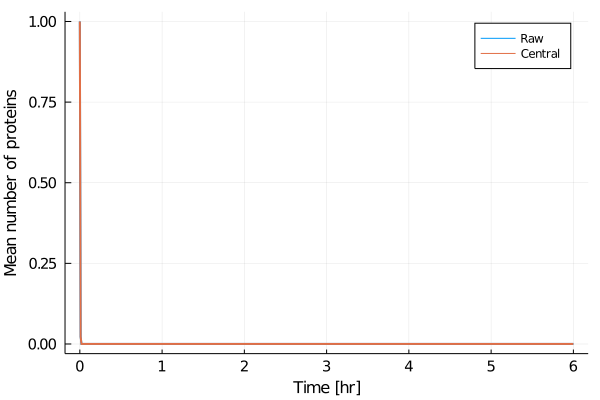

In [13]:
using Plots

plot(sol_central.t, [sol_raw[1,:], sol_central[1,:]], 
    label  = ["Raw" "Central"], 
    legend = true,
    xlabel = "Time [hr]",
    ylabel = "Mean number of proteins",
    lw=2,
    legendfontsize=8,
    xtickfontsize=10,
    ytickfontsize=10,
    dpi=100)

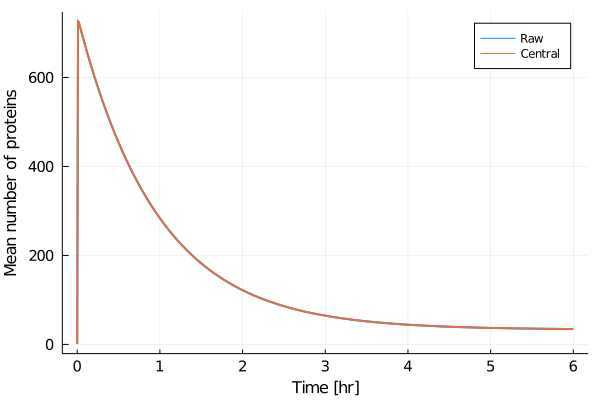

In [14]:
plot(sol_central.t, [sol_raw[2,:], sol_central[2,:]], 
    label  = ["Raw" "Central"], 
    legend = true,
    xlabel = "Time [hr]",
    ylabel = "Mean number of proteins",
    lw=2,
    legendfontsize=8,
    xtickfontsize=10,
    ytickfontsize=10,
    dpi=100)

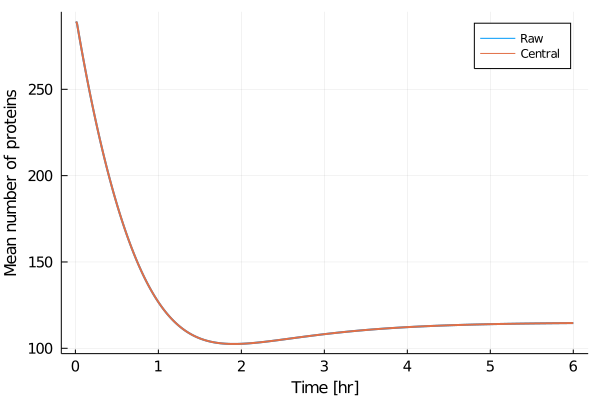

In [15]:
raw_std = sqrt.(sol_raw[4,2:end] .- sol_raw[2,2:end].^2)
central_std = sqrt.(sol_central[4,2:end])
plot(sol_central.t[2:end], [raw_std, central_std], 
    label  = ["Raw" "Central"], 
    legend = true,
    xlabel = "Time [hr]",
    ylabel = "Mean number of proteins",
    lw=2,
    legendfontsize=8,
    xtickfontsize=10,
    ytickfontsize=10,
    dpi=100)